# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

##### The objective of the assignment is to determine the key features that determine the price of a used car and ultimately help the car delaerships to better manage their inventory. To achieve this, let's classify this business into the following data problem and try to answer them at the end

1. Identify the top features that determines the price of a used car.


2. Does the year of manufacture of the used car contribute to the overall price?


3. Give the green earth drive, are electric cars getting more popular and if so does the state where the car is sold drive the price of a used car?


4. Are American made cars more popular than imported cars, if so which cars contribute to the price?


5. Does the number of miles driven influence the price of a car?



### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [4]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import median_absolute_error, mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector,RFE
from scipy.special import exp10
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor


In [5]:
df = pd.read_csv('data/vehicles.csv')
# Explore the columns and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [9]:
# Explore the stats on the given numeric fields as is
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [7]:
# Browsing through few records indicate a lot of empty values. The dataset also has 2 numeric fields and
# mostly categorical data.
df.head(100)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7309798041,auburn,2100,2006.0,subaru,impreza,fair,4 cylinders,gas,97000.0,clean,automatic,NaN,NaN,NaN,hatchback,NaN,al
96,7309361405,auburn,80,2004.0,honda,NaN,excellent,6 cylinders,gas,94020.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al
97,7309271279,auburn,15990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,gas,29652.0,clean,other,JTNKARJEXGJ517925,fwd,NaN,hatchback,blue,al
98,7309271051,auburn,20590,2013.0,acura,mdx sport utility 4d,good,6 cylinders,gas,77087.0,clean,other,2HNYD2H30DH510846,NaN,NaN,other,silver,al


In [11]:
df.count()

id              426880
region          426880
price           426880
year            425675
manufacturer    409234
model           421603
condition       252776
cylinders       249202
fuel            423867
odometer        422480
title_status    418638
transmission    424324
VIN             265838
drive           296313
size            120519
type            334022
paint_color     296677
state           426880
dtype: int64

In [8]:
#Explore the null columns  and missing values. It seems there are a lot of missing values and we need to determine 
#which one we should fill.
df.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

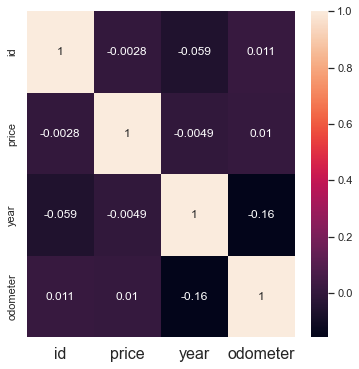

In [27]:
#First glance or correlation on the raw data gives a vague idea of negative correlation between price and year, suggesting that
#price does depreceate wit the age of the car. Later we can convert the Year field to age for our analysis.
df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

Text(0, 0.5, 'Year')

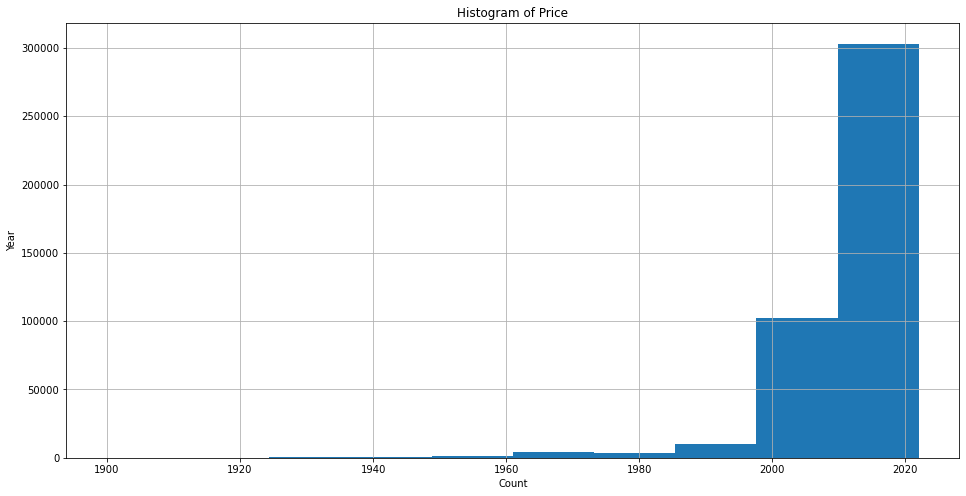

In [14]:
# Plot the distribution of used cars by year. Looks like the dataset contains mostly cars from lasr decade
plt.figure(figsize=(16,8))
df["year"].hist()
plt.title('Histogram of Price')
plt.xlabel('Count')
plt.ylabel('Year')

Skewness: -2.413401


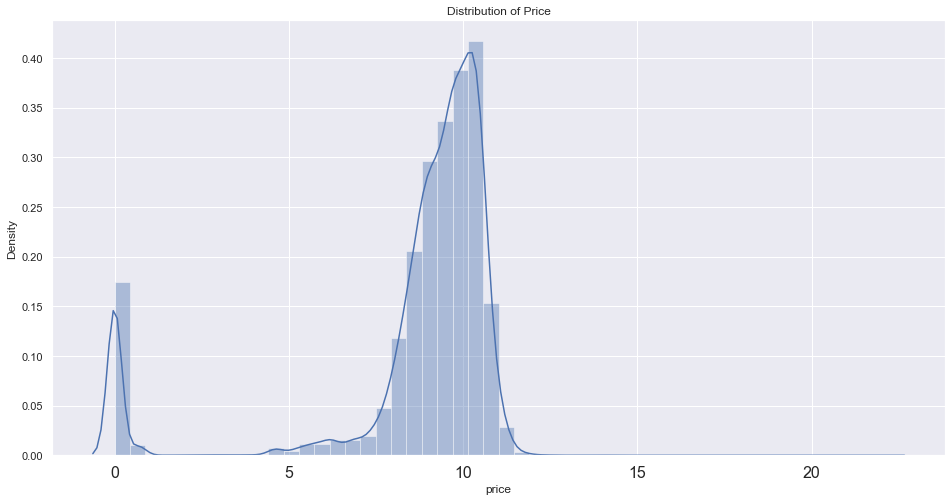

In [23]:
# The log transformation the price distribution looks more normal with few outliers. Which indicates that we should check
# the MAE values in future
# since MSE has higher penality for outliers
plt.figure(figsize=(16,8))
sns.distplot(np.log1p(df["price"]))
plt.title('Distribution of Price')
print("Skewness: %f" % np.log1p(df["price"]).skew())

In [16]:
# Next let's check categorical columns and their value counts
cat_cols=['manufacturer', 'model', 'condition', 'fuel', 'title_status', 'transmission', 'type','cylinders','drive','size']
for c in cat_cols:
    print(c,'------')
    print(df[c].value_counts())
    
# By looking at the categorical data, we will use one hot encoding for unordered data colums (manufacturer,model,fuel, 
#transmission,type,size,drive)
# Ordinal Encoder for ordered data (condition )
# Years column can be used to create age of the vehicle
# Drop VIN because it doesnt really add value to the dataset


manufacturer ------
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston

<AxesSubplot:title={'center':'Price point of cars by type'}, xlabel='type', ylabel='price'>

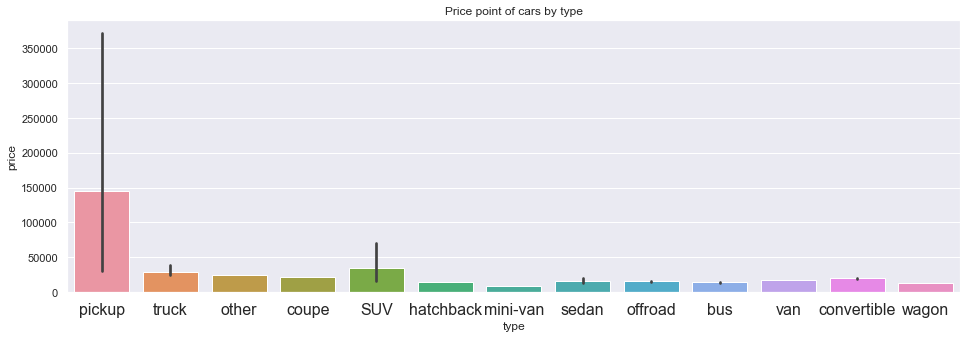

In [28]:
# Next plot some features to analyze the price points.
#Let's check the price point of cars by type. It appears that pickup trucks are contributing to higher price point followed by SUVs
plt.figure(figsize=(16,5))
plt.title('Price point of cars by type')
sns.set(rc={'axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['type'],df["price"])

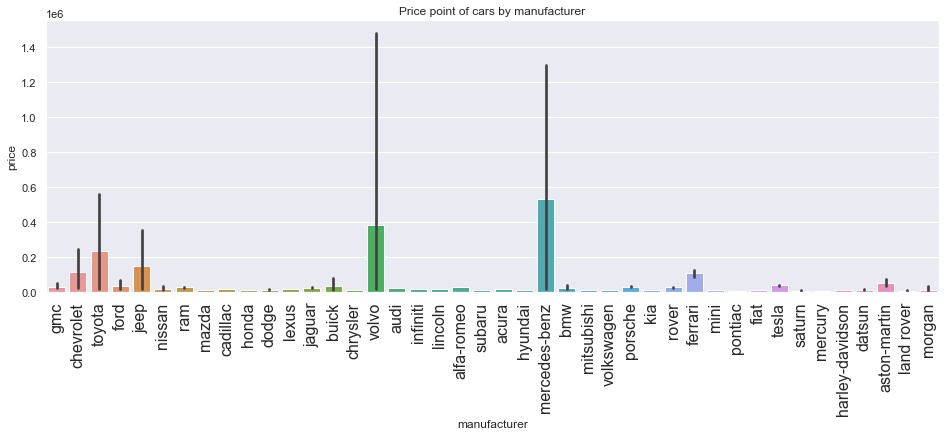

In [55]:
#Let's check the price point of cars by manufacturer. It appears that Mercedez-Benz are contributing to higher price point followed by Volvo and Toyota
plt.figure(figsize=(16,5))
plt.title('Price point of cars by manufacturer')
sns.set(rc={'axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['manufacturer'],df["price"])
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Count plot point of cars by manufacturer')

<Figure size 1440x720 with 0 Axes>

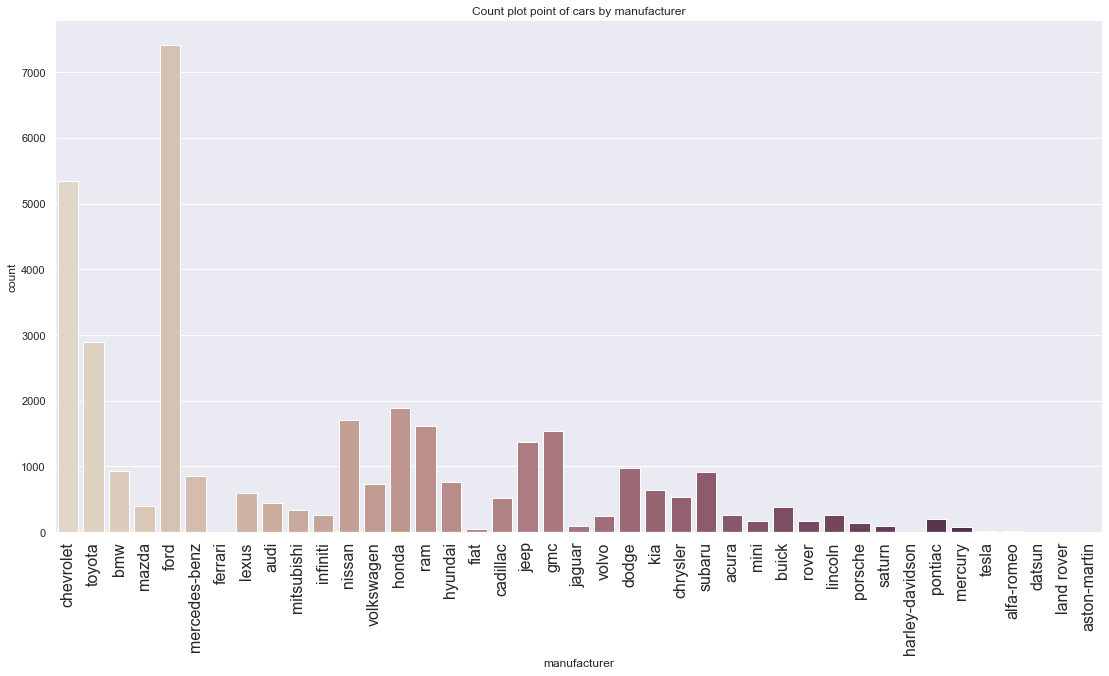

In [58]:
# Analyzing te count plot by manufacturer, American cars like ford, Chevy are on the top of the list for the most selling cars.
var = "manufacturer"

plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df.dropna());
plt.xticks(rotation=90);
plt.title('Count plot point of cars by manufacturer')

In [ ]:
# sns.barplot(x = df['price'], y = df['odometer'], data = df.dropna())  
# plt.show()

In [39]:
# Analyze the scatter plot by eliminating some outliers to detect any strong coorelation between miles driven and price point. There is a  
# positive coorelation between the two but not very linear.

yprop = 'price'
xprop = 'odometer'
# h= 'fuel'
px.scatter(df.dropna().loc[(df.dropna()['price'] > 1000) & (df.dropna()['odometer']  <1000000)], x=xprop, y=yprop, title="Correlation Analysis Odometer vs Car Price")

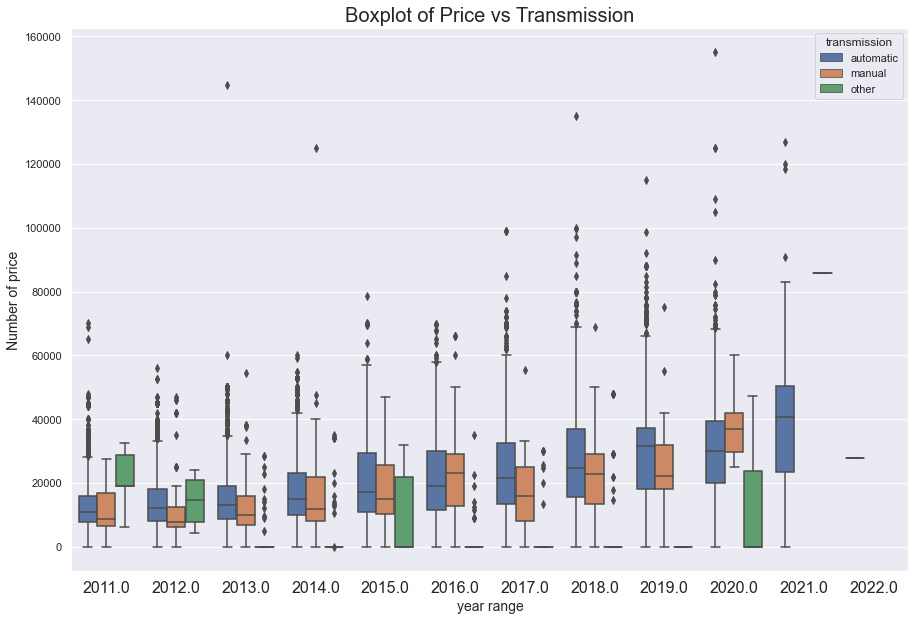

In [41]:
# Next check the plot for transmission vs price. The boxplot clearly indicates that in the last few years the trend is 
#shifting towards automatic  transmission
plt.figure(figsize=(15,10))
xprop = 'year'
yprop = 'price'
mask = (df['year'] > 2010)
sns.boxplot(data=df.dropna().loc[mask], x=xprop, y=yprop, hue='transmission')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of Price vs Transmission' , size=20)
plt.show()

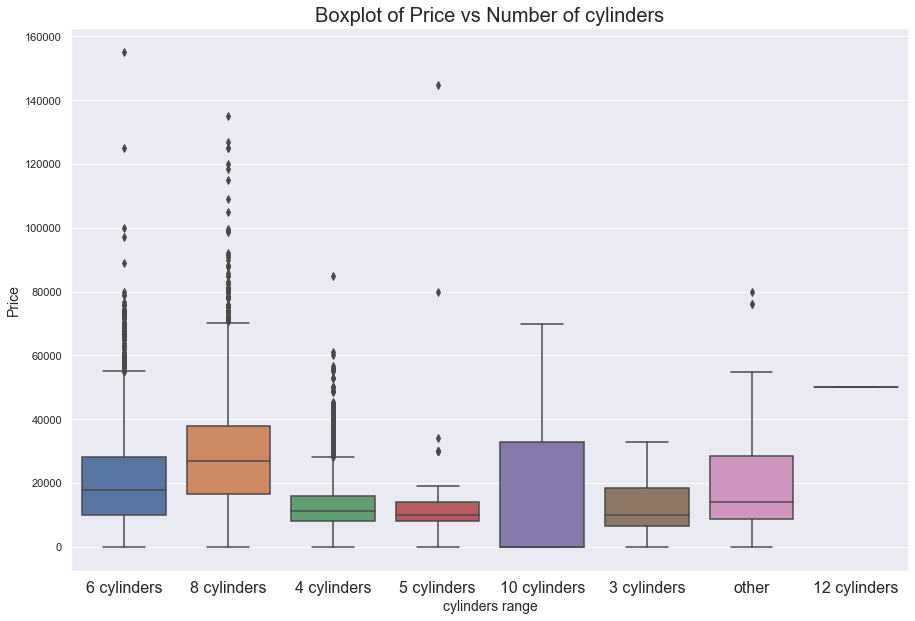

In [48]:
# Next check the plot for number of cylinders vs price. The boxplot does point the increase in number of cylinders does have an 
#impact on the price but we will know better by converting this field to numeric for further analysis.
plt.figure(figsize=(15,10))
xprop = 'cylinders'
yprop = 'price'
mask = (df['year'] > 2010)
sns.boxplot(data=df.dropna().loc[mask], x=xprop, y=yprop)
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Price', size=14)
plt.title('Boxplot of Price vs Number of cylinders' , size=20)
plt.show()

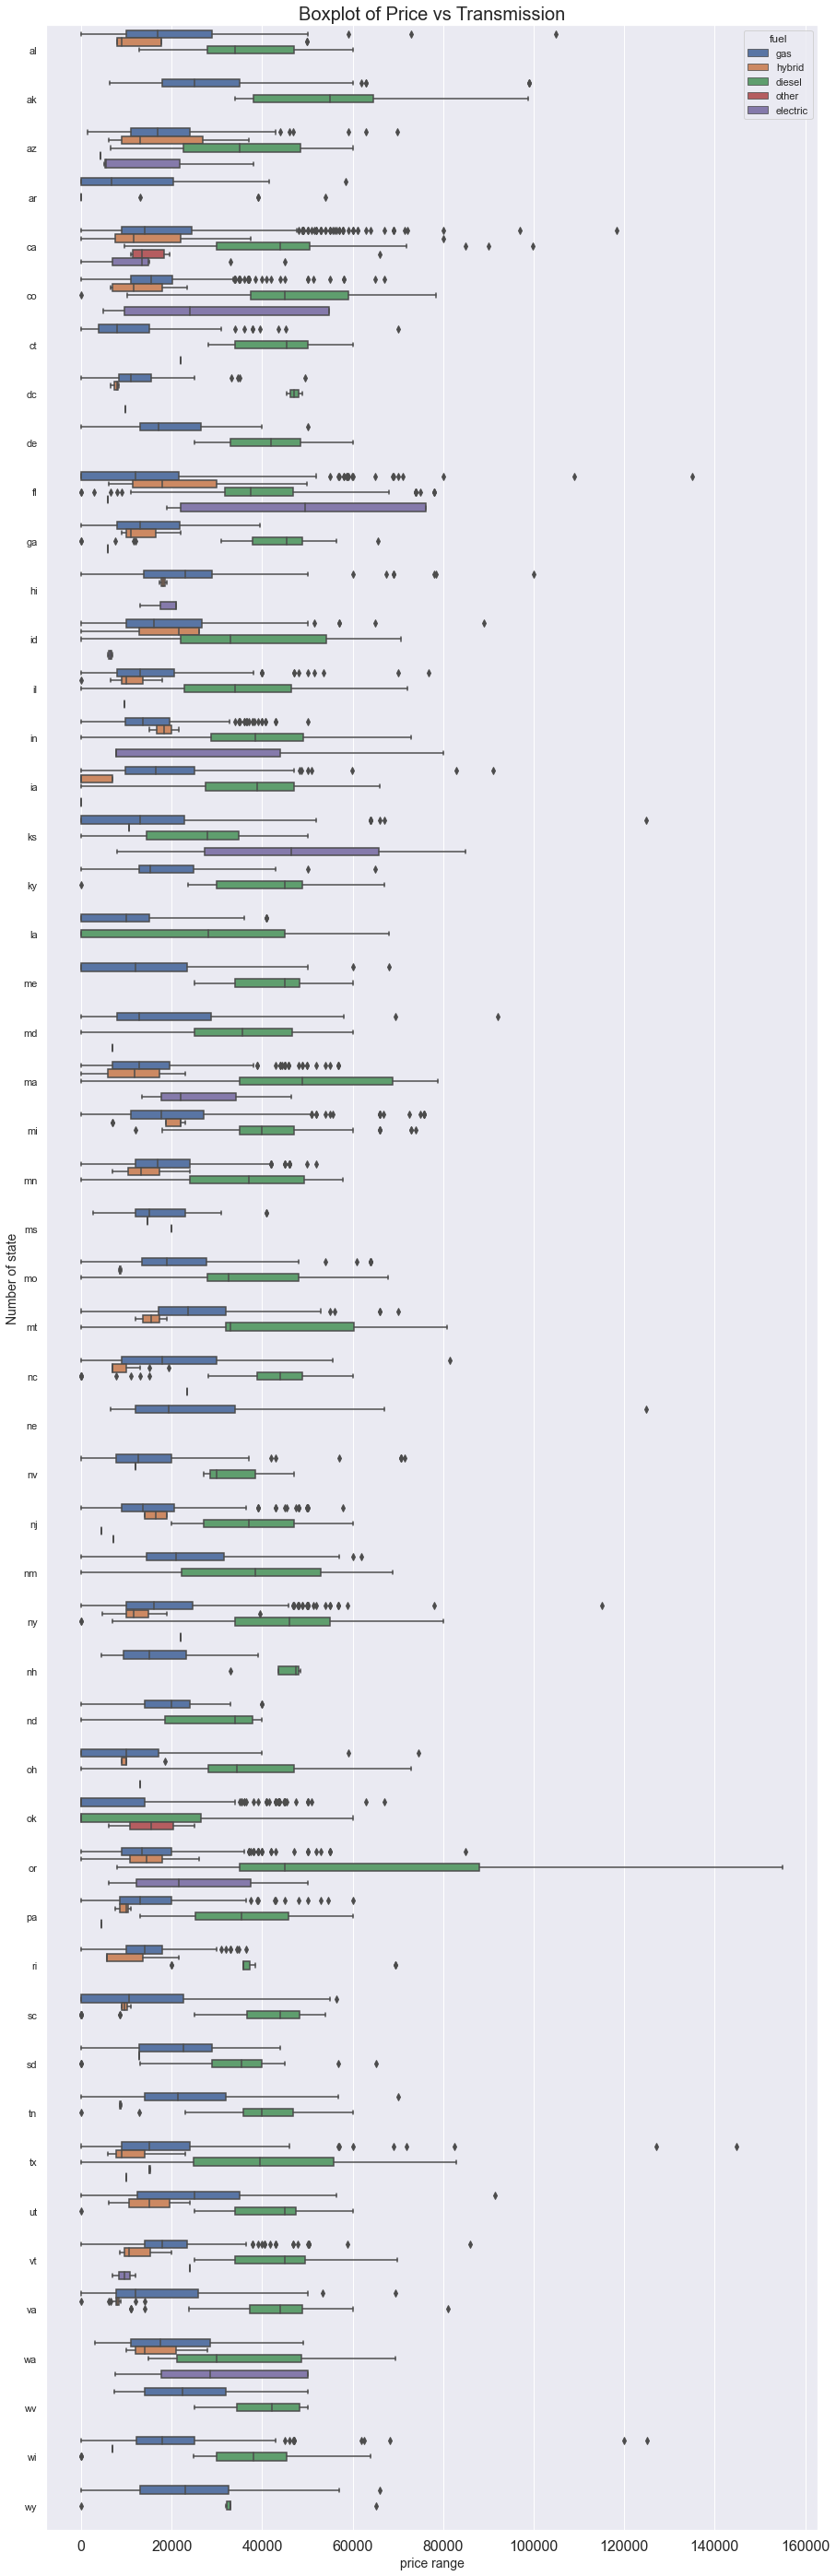

In [54]:
# Looking at the fuel type distribution of used cars in various states, surprised to see that Diesel cars most sold 
#even in green states like California where I expected electric cars to be pcking up
plt.figure(figsize=(15,50))
xprop = 'price'
yprop = 'state'
mask = (df['year'] > 2010)
sns.boxplot(data=df.dropna().loc[mask], x=xprop, y=yprop, hue='fuel')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Statewise density of cars by fuel type' , size=20)
plt.show()

#### After an EDA, we have identified various features to see which one qualifies to be numeric representation vs categorical. Some features show strong correlation with the price. We also need to eliminate nulls after encoding some of the categorical fields.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [59]:
# Create new dataframe from origical dataset
usedcars_original=df

In [60]:
# Create a new column age from Year column, assuming the current year is 2022
usedcars_original['age']=(2022 - usedcars_original.dropna()['year']).astype(int)

In [61]:
# Make sure the numeric columns have positive integers because negative numbers do not make sense for these columns
usedcars_original = usedcars_original[usedcars_original.price > 100] 
usedcars_original = usedcars_original[usedcars_original.odometer > 100]

In [62]:
# drop unnecesary or duplicate data columns
drop_columns = ['VIN','region','id','year']
usedcars_original = usedcars_original.drop(columns=drop_columns)


In [63]:
# convert cylinders to numeric field
usedcars_original["cylinders"] = usedcars_original["cylinders"].dropna().str.replace('other','1').replace('12 cylinders','12').replace('10 cylinders','10').replace('3 cylinders','3').replace('5 cylinders','5').replace('4 cylinders','4').replace('6 cylinders','6').replace('8 cylinders','8').astype(int)


In [64]:
usedcars_original.corr()

,price,cylinders,odometer,age
price,1.000000,0.004015,0.011225,-0.348513
cylinders,0.004015,1.000000,0.016209,0.147298
odometer,0.011225,0.016209,1.000000,0.208710
age,-0.348513,0.147298,0.208710,1.000000


In [66]:
#Examine the highest correlated numeric feature
highest_corr = usedcars_original.corr()[['price']].nlargest(columns = 'price', n = 2).index[1]
highest_corr

'odometer'

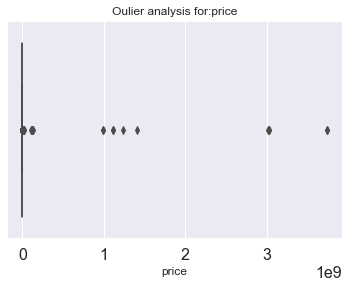

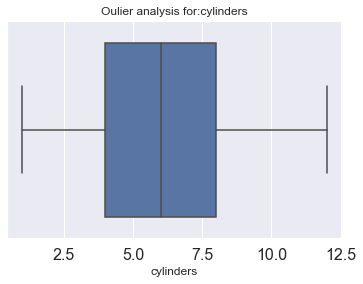

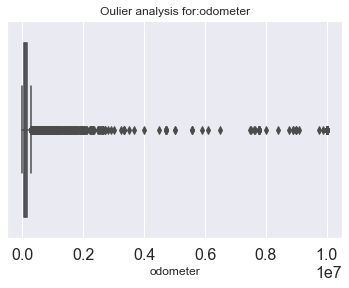

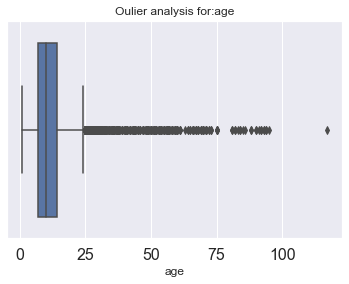

In [75]:
#Handle outliers
category_columns=usedcars_original.select_dtypes(include=['object']).columns.tolist()
integer_columns=usedcars_original.select_dtypes(include=['int64','float64']).columns.tolist()

for i in integer_columns:
    plt.figure()
    sns.boxplot(x=usedcars_original[i])
    plt.title('Oulier analysis for:'+i)


In [76]:
# The box plot shows that we can include cars that are up to 20 years old and the odometer reading can be limited to 2M approximately
usedcars_clean=usedcars_original[usedcars_original['age']<20]
usedcars_clean.shape

(29296, 15)

In [77]:
usedcars_clean=usedcars_clean.dropna()
usedcars_clean

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,age
268,9000,mazda,miata mx-5,excellent,4.0,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al,14.0
337,8950,ford,f-150,excellent,6.0,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al,11.0
355,9400,mercedes-benz,benz c350,good,6.0,gas,129473.0,clean,automatic,rwd,full-size,sedan,silver,al,14.0
364,7300,lexus,rx350,good,6.0,gas,181000.0,clean,automatic,fwd,mid-size,SUV,white,al,15.0
365,72900,chevrolet,tahoe,good,8.0,gas,19129.0,clean,automatic,4wd,full-size,SUV,grey,al,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426784,24995,gmc,sierra,good,8.0,gas,128722.0,clean,automatic,4wd,full-size,truck,white,wy,8.0
426785,23495,ford,f150 xlt 4x4,like new,8.0,gas,146795.0,clean,automatic,4wd,full-size,truck,black,wy,7.0
426788,12995,chevrolet,cruze lt,like new,4.0,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy,6.0
426792,32999,ford,"f350, xlt",excellent,8.0,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy,8.0


In [78]:
usedcars_clean.isna().sum()

price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
age             0
dtype: int64

In [79]:
#usedcars_clean=usedcars_original[usedcars_original['manufacturer']=='land rover']
# performed this step after modelling indicated tse outliers
usedcars_clean.drop(usedcars_clean[usedcars_clean['manufacturer'] == "land rover"].index, inplace = True)
usedcars_clean.drop(usedcars_clean[usedcars_clean['manufacturer'] == "ferrari"].index, inplace = True)

In [80]:
#re evaluating the correlations reveals cylinders as the highest correlated numeric feature
highest_corr = usedcars_clean.corr()[['price']].nlargest(columns = 'price', n = 2).index[1]
highest_corr

'cylinders'

<AxesSubplot:title={'center':'Newer to Older car Price classified by Transmission'}, xlabel='age', ylabel='price'>

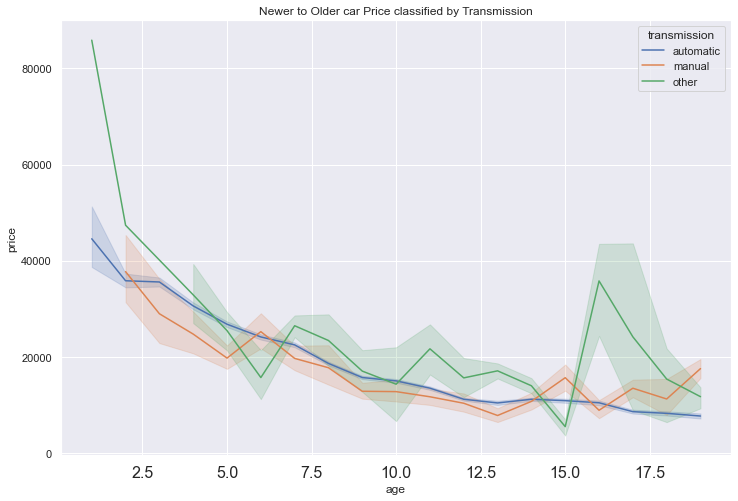

In [81]:
# Plot the clean data to analyze Newer to Older car Price classified by Transmission, suggests that automatic cars are more popular
# than manual, and other (possibly hybrid) as higher demand in newer used cars.
plt.figure(figsize=(12,8))
#sns.set(rc={'axes.facecolor':'white','axes.grid': True,'xtick.labelsize':16})
plt.title('Newer to Older car Price classified by Transmission')
sns.lineplot(x='age',y='price',data=usedcars_clean,hue='transmission')

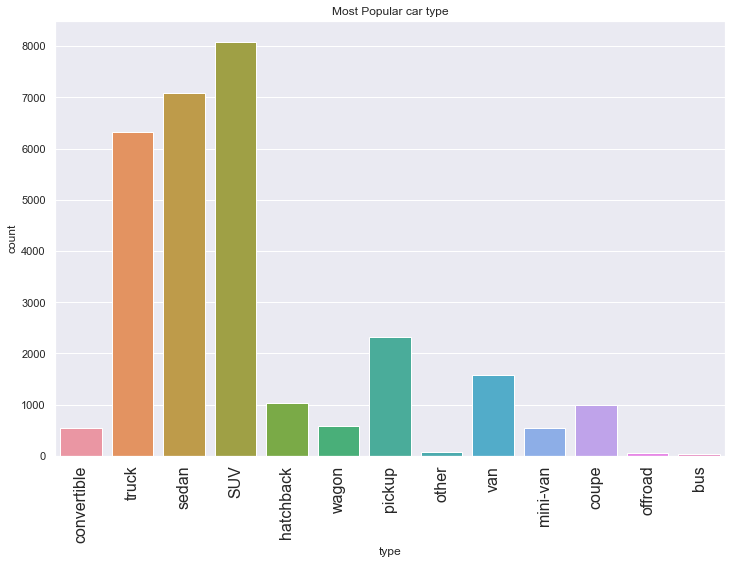

In [82]:
plt.figure(figsize=(12,8))
plt.title('Most Popular car type')
sns.countplot(usedcars_clean['type'])
plt.xticks(rotation=90);

In [83]:
# Finally lets reevaluate the correlation matrix
usedcars_clean.corr()

,price,cylinders,odometer,age
price,1.000000,0.417563,-0.402452,-0.542817
cylinders,0.417563,1.000000,0.125654,0.115692
odometer,-0.402452,0.125654,1.000000,0.501901
age,-0.542817,0.115692,0.501901,1.000000


#### The dataset as been evaluated and cleaned and has around 30,000 rows and 15 features  to start wit modelling. 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [85]:
# Start modeling using a 70/30 split into Training and Test sets using a  a random state 
X = usedcars_clean.drop('price', axis = 1)
y = usedcars_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [86]:
# Calculate the baseline Mean Absolute Error
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
mse_baseline_train = median_absolute_error(baseline_train, y_train)
mse_baseline_test = median_absolute_error(baseline_test, y_test)
print(mse_baseline_train,mse_baseline_test)

8772.553377225067 9017.94674556213


In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20505 entries, 414075 to 163528
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  20505 non-null  object 
 1   model         20505 non-null  object 
 2   condition     20505 non-null  object 
 3   cylinders     20505 non-null  float64
 4   fuel          20505 non-null  object 
 5   odometer      20505 non-null  float64
 6   title_status  20505 non-null  object 
 7   transmission  20505 non-null  object 
 8   drive         20505 non-null  object 
 9   size          20505 non-null  object 
 10  type          20505 non-null  object 
 11  paint_color   20505 non-null  object 
 12  state         20505 non-null  object 
 13  age           20505 non-null  float64
dtypes: float64(3), object(11)
memory usage: 2.3+ MB


In [93]:
# Based on the analysis done during the data understanding phase, transform the categorical columns into respective 
# ordinal, binary, and one hot encoding 
# the numerical columns will pass through standard scalar
ordinal_cols=['condition']
bin_cols=['model']
ohe_cols=['manufacturer','fuel','transmission','type','size','drive','title_status','paint_color','state']
num_cols = ["cylinders", "odometer", "age"]

ordinal_ohe_transformer = make_column_transformer(
    (OneHotEncoder(drop="if_binary",handle_unknown='ignore'), ohe_cols),
    (ce.BinaryEncoder(),bin_cols),
(OrdinalEncoder(categories = [['good','excellent','like new','fair','new','salvage']]), ordinal_cols),
                        (StandardScaler(), num_cols),                          
                                          remainder='passthrough')

# First model is created using the trasnformed columns and Simple Linear Regression and yields a good MAE as compared to basline

pipe1 = Pipeline([('transformer', ordinal_ohe_transformer), ('linreg', LinearRegression())])
pipe1.fit(X_train, y_train)
p1 = pipe1.predict(X_train)
p2 = pipe1.predict(X_test)
print(f'Train MAE: {median_absolute_error(y_train, p1)}')
print(f'Test MAE: {median_absolute_error(y_test, p2)}')
print(f'Accuracy Score: {pipe1.score(X_test,y_test)}')

# At this stage identied few outliers in manufactuerer and went back and forth to fix category error.



Train MAE: 3064.4260433352865
Test MAE: 3128.9647597266157
Accuracy Score: 0.7494920372530334


In [66]:
# ridge=Ridge()
# selector=SequentialFeatureSelector(estimator=Lasso(),n_features_to_select=4)
# # X_train.columns[selector.get_support()]
# model=RFE(estimator=Lasso(),n_features_to_select=4)
# ridge.fit(X_train[num_cols] X_train.loc[:, ["Courses","Fee","Duration"]] , y_train)
# plt.barh(num_cols,ridge.coef_)


In [130]:
# Second model using TransformedTargetRegressor using Ridge as regressor.
#log of target so that we can get normal distribution
pipe2 = make_pipeline(ordinal_ohe_transformer, TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=exp10
    ))
pipe2.fit(X_train, y_train)
    #fit on train
p1 = pipe2.predict(X_train)
p2 = pipe2.predict(X_test)
print(f'Train MAE: {median_absolute_error(y_train, p1)}')
print(f'Test MAE: {median_absolute_error(y_test, p2)}')
print(f'Accuracy Score: {pipe2.score(X_test,y_test)}')


Train MAE: 2182.6281732873504
Test MAE: 2233.4132519614086
Accuracy Score: 0.777833604125206


In [129]:
# Cross Validation using GridSearch CV suggested best alpha as 1.0 but the MAE was comparable.
param_dict = {'ridge__regressor__alpha': np.logspace(0, 10, 20)}
pipev2 = Pipeline([( 'ridge', TransformedTargetRegressor(regressor=Ridge(), func=np.log10, inverse_func=exp10)) ])
grid = GridSearchCV(estimator=pipev2, param_grid=param_dict)
grid_2 = make_pipeline(ordinal_ohe_transformer, grid)
grid_2.fit(X_train, y_train)
train_preds = grid_2.predict(X_train)
test_preds = grid_2.predict(X_test)
model_2_train_mse = median_absolute_error(y_train, train_preds)
model_2_test_mse = median_absolute_error(y_test, test_preds)
print(f'Train MAE: {model_2_train_mse}')
print(f'Test MAE: {model_2_test_mse}')
print(f'Best Alpha: {grid.best_params_}')


Train MAE: 2189.5382513783225
Test MAE: 2221.319766544868
Best Alpha: {'ridge__regressor__alpha': 1.0}


In [132]:
# Model 3 using Lasso Regression
pipe3 = Pipeline([('transformer', ordinal_ohe_transformer), ('lassoreg', Lasso())])
pipe3.fit(X_train, y_train)
    #fit on train
p1 = pipe3.predict(X_train)
p2 = pipe3.predict(X_test)
print(f'Train MAE: {median_absolute_error(y_train, p1)}')
print(f'Test MAE: {median_absolute_error(y_test, p2)}')
print(f'Accuracy Score: {pipe3.score(X_test,y_test)}')

Train MAE: 3062.3890227254597
Test MAE: 3121.01911715417
Accuracy Score: 0.7490349081436223


In [133]:
# Model 4 using Ridge Regression
pipe4 = Pipeline([('transformer', ordinal_ohe_transformer), ('ridgereg', Ridge())])
pipe4.fit(X_train, y_train)
    #fit on train
p1 = pipe4.predict(X_train)
p2 = pipe4.predict(X_test)
print(f'Train MAE: {median_absolute_error(y_train, p1)}')
print(f'Test MAE: {median_absolute_error(y_test, p2)}')
print(f'Accuracy Score: {pipe4.score(X_test,y_test)}')

Train MAE: 3058.7108604793793
Test MAE: 3134.5128041030794
Accuracy Score: 0.7486701358234975


In [134]:
# Model 5 using TransformedTargetRegressor using RandomForestRegressor as regressor. This took a long time 
# to run but gave me the best results. I settled on 20 as n_estimators based on processing time. The accuracy also greatly 
# improved to 88%
pipe5 = make_pipeline(ordinal_ohe_transformer, TransformedTargetRegressor( regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)))
pipe5.fit(X_train, y_train)
    #fit on train
p1 = pipe5.predict(X_train)
p2 = pipe5.predict(X_test)
print(f'Train MAE: {median_absolute_error(y_train, p1)}')
print(f'Test MAE: {median_absolute_error(y_test, p2)}')
print(f'Accuracy Score: {pipe5.score(X_test,y_test)}')

367.7000000000007
974.4250000000004
0.8866066210044716


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [135]:
# Now that we have our 5 models, let's pick the model with the best accuracy (Model 5 using TransformedTargetRegressor 
# using RandomForestRegressor as regressor) and run the permtation importance to identify # the key features
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(
    pipe5, X_test, y_test, n_repeats=30, random_state=0, scoring=scoring)

for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"    {X_test.columns[i]:<8}"
                  f"  {r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

r2
    age       0.458 +/- 0.009
    cylinders  0.327 +/- 0.009
    odometer  0.271 +/- 0.006
    fuel      0.183 +/- 0.005
    drive     0.089 +/- 0.004
    type      0.070 +/- 0.002
    manufacturer  0.041 +/- 0.002
    model     0.021 +/- 0.001
    paint_color  0.012 +/- 0.001
    state     0.008 +/- 0.002
    condition  0.005 +/- 0.000
    title_status  0.003 +/- 0.000
    size      0.002 +/- 0.000
    transmission  0.001 +/- 0.000
neg_mean_absolute_percentage_error
    age       0.413 +/- 0.012
    odometer  0.255 +/- 0.008
    cylinders  0.242 +/- 0.013
    drive     0.125 +/- 0.008
    type      0.118 +/- 0.005
    fuel      0.088 +/- 0.009
    manufacturer  0.062 +/- 0.003
    state     0.044 +/- 0.003
    model     0.040 +/- 0.003
    paint_color  0.026 +/- 0.002
    condition  0.012 +/- 0.001
    size      0.009 +/- 0.001
    title_status  0.005 +/- 0.001
    transmission  0.002 +/- 0.000
neg_mean_squared_error
    age       79764054.197 +/- 1518707.773
    cylinders  5699000

In [136]:
# The feature importance shows that age, cylinders, odometer, fuel, drive, type, manufacturer as top features. 
#So we can build a new model using just these features
usedcars_selectedfeatures = usedcars_clean
usedcars_selectedfeatures=usedcars_selectedfeatures.drop([ 'model', 'paint_color','state','condition','title_status','size','transmission'], axis=1)

X=usedcars_selectedfeatures.drop('price', axis = 1)
y = usedcars_selectedfeatures['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)


In [137]:
# choosing to use one hot encoding for the categorical fields this time
ohe_cols=['fuel','drive','type','manufacturer']
num_cols = ["cylinders", "odometer", "age"]
ohe_transformer = make_column_transformer(
    (OneHotEncoder(drop="if_binary",handle_unknown='ignore'), ohe_cols),(StandardScaler(), num_cols),remainder='passthrough')

In [142]:
# The results did not have a huge change in accuracy.
pipe6 = make_pipeline(ohe_transformer, TransformedTargetRegressor( regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)))
pipe6.fit(X_train, y_train)
    #fit on train
p1 = pipe6.predict(X_train)
p2 = pipe6.predict(X_test)
print(f'Train MAE: {median_absolute_error(y_train, p1)}')
print(f'Test MAE: {median_absolute_error(y_test, p2)}')
print(f'Accuracy Score: {pipe6.score(X_test,y_test)}')

Train MAE: 349.0
Test MAE: 933.5062500000004
Accuracy Score: 0.8819314747842562


In [143]:
# Trying one more model using one hot encoding this time for all categorical fields. Since model and State were not
# significantly important in R2 analysis, choosing to drop them
usedcars_selectedfeatures = usedcars_clean
usedcars_selectedfeatures=usedcars_selectedfeatures.drop([ 'model','state'], axis=1)

X=usedcars_selectedfeatures.drop('price', axis = 1)
y = usedcars_selectedfeatures['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [144]:
usedcars_selectedfeatures

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
268,9000,mazda,excellent,4.0,gas,56700.0,clean,automatic,rwd,compact,convertible,white,14.0
337,8950,ford,excellent,6.0,gas,164000.0,clean,automatic,fwd,full-size,truck,white,11.0
355,9400,mercedes-benz,good,6.0,gas,129473.0,clean,automatic,rwd,full-size,sedan,silver,14.0
364,7300,lexus,good,6.0,gas,181000.0,clean,automatic,fwd,mid-size,SUV,white,15.0
365,72900,chevrolet,good,8.0,gas,19129.0,clean,automatic,4wd,full-size,SUV,grey,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426784,24995,gmc,good,8.0,gas,128722.0,clean,automatic,4wd,full-size,truck,white,8.0
426785,23495,ford,like new,8.0,gas,146795.0,clean,automatic,4wd,full-size,truck,black,7.0
426788,12995,chevrolet,like new,4.0,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,6.0
426792,32999,ford,excellent,8.0,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,8.0


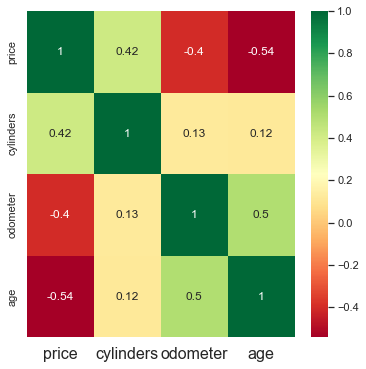

In [152]:
# re evaluating heat map
plt.figure(figsize=(6,6))
sns.heatmap(usedcars_selectedfeatures.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [145]:
# choosing to use one hot encoding for categorical fields
ohe_cols=['fuel','drive','type','manufacturer', 'paint_color','condition','title_status','size','transmission']
num_cols = ["cylinders", "odometer", "age"]
ohe_full_transformer = make_column_transformer(
    (OneHotEncoder(drop="if_binary",handle_unknown='ignore'), ohe_cols),(StandardScaler(), num_cols),remainder='passthrough')

In [149]:
pipe7 = make_pipeline(ohe_full_transformer, TransformedTargetRegressor( regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)))
pipe7.fit(X_train, y_train)
    #fit on train
p1 = pipe7.predict(X_train)
p2 = pipe7.predict(X_test)
print(f'Train MAE: {median_absolute_error(y_train, p1)}')
print(f'Test MAE: {median_absolute_error(y_test, p2)}')
print(f'Accuracy Score: {pipe7.score(X_test,y_test)}')

Train MAE: 338.21999999999935
Test MAE: 871.0999999999985
Accuracy Score: 0.8909045536590411


<AxesSubplot:title={'center':'Feature Importance using RandomForestRegressor (Model accuracy 89%)'}, xlabel='Feature Importances', ylabel='Transformed Features'>

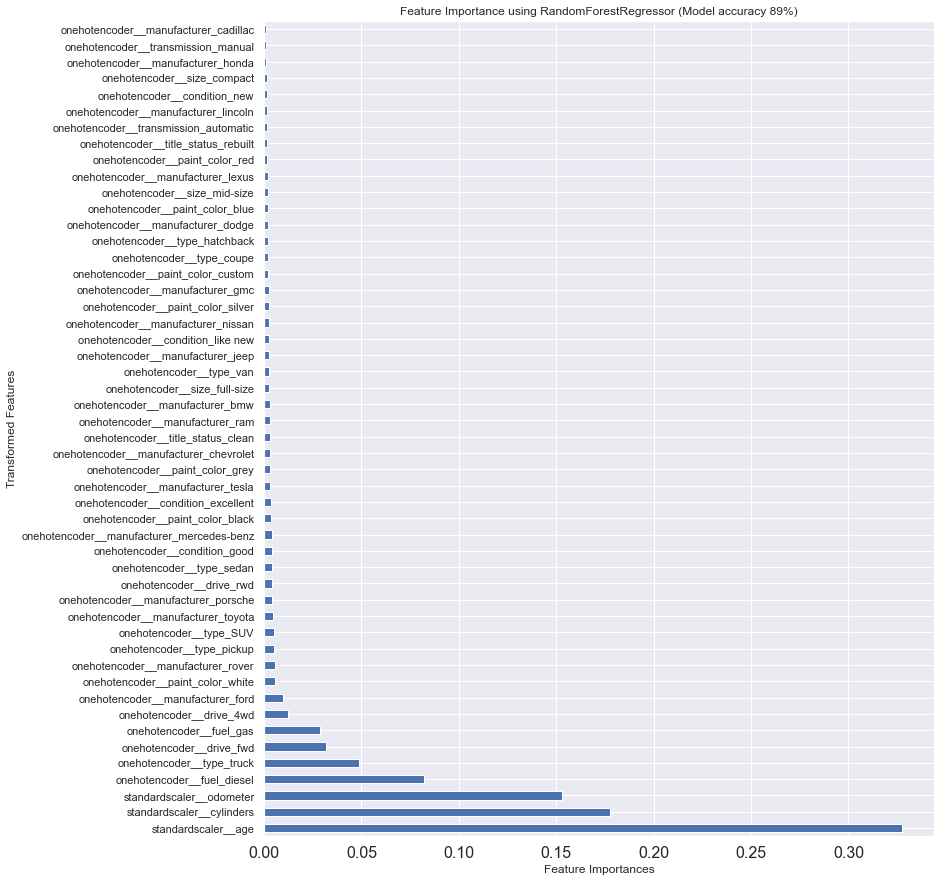

In [153]:
# Now that we have evaluated and identified the best model, lets looks at the bar graph showing the most important features in 
# order
plt.figure(figsize = (12,15))
plt.title("Feature Importance using RandomForestRegressor (Model accuracy 89%)")
plt.ylabel("Transformed Features")
plt.xlabel("Feature Importances")
feature_names_final = pipe7[:-1].get_feature_names_out() 
fi = pd.Series(
    pipe7[-1].regressor_.feature_importances_,    
    index=feature_names_final
)
fi.nlargest(50).plot(kind='barh')



#### The permutation importance and the significant features driving the target (Used Car Price) extracted from the best model suggest that the newer used cars, followed by powerful engines and fewer mileage drives the price of used car. In granular level, diesel engined trucks seem to be hot sellers as well followed by American cars like gas driven ford seems to be very popular.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Final report

The features in a used car that are most valued by the customers are 

* Relatively newer cars with powerful engines and that have low mileage are the best sellers and can get you bang for the buck.


* For limited space dealerships, my study further indicates that Trucks/Picks up are great sellers.


* Diesel Engine cars seem to be very popular which could be a factor of higher gas prices followed by gas cars. 


* American car models like Ford, Chevy preferably white(neutral color) are extremely common sell. Since people in America love to take road trips


* Family and durable cars like Toyota and Rover seems to be popular as well.


* Surprisingly Electric cars have not caught up yet, but something to look out for in the future, as it picks up.


* Luxury cars are a rare sell, so I would suggest stock it based on location.

### Next steps and recommendations

To further improve the model with better accuracy, I would recommend:

* Improve data quality, by collecting information like, number of previous owners, accident reports, safety features, service records


* Create new models using different split ratios


* Get economic data like pandemics, recession, war that can effect supply chain and potentially impact the sales.


* Also, forecast models can be build if we have sale data.
